In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

In [2]:
DATADIR = 'PetImages'
CATEGORIES = ['Dog', 'Cat']

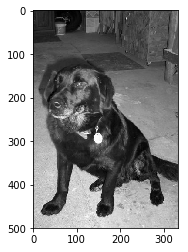

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array)

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


In [6]:
img_array.shape

(500, 333)

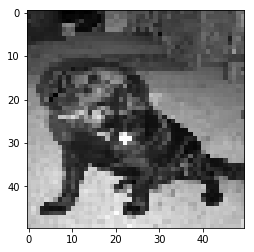

In [14]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [15]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except:
                pass
            
create_training_data()

In [16]:
print(len(training_data))

24946


In [18]:
random.shuffle(training_data)

In [19]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [20]:
import pickle

with open("X.pickle", "wb") as pickle_out:
    pickle.dump(X, pickle_out)
    
with open("y.pickle", "wb") as pickle_out:
    pickle.dump(y, pickle_out)

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [33]:
X = X/255.0

In [34]:
model = Sequential()

model.add(Conv2D(255, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

In [35]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [37]:
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/3
17462/17462 [==============================] - 2400s 137ms/step - loss: 0.6932 - acc: 0.5052 - val_loss: 0.6934 - val_acc: 0.4952
Epoch 2/3
17462/17462 [==============================] - 2415s 138ms/step - loss: 0.6933 - acc: 0.5001 - val_loss: 0.6931 - val_acc: 0.5048
Epoch 3/3
17462/17462 [==============================] - 2268s 130ms/step - loss: 0.6933 - acc: 0.4940 - val_loss: 0.6932 - val_acc: 0.4952
